# Time series analysis of the average temperature in Cincinnati

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller

plt.rcParams.update({'figure.figsize': (10,10)})

In [181]:
# Importing the Datasets
Citytemp = pd.read_csv('Data/GlobalLandTemperaturesByCity.csv', parse_dates=['dt'], index_col='dt')
GlobalTemperatures = pd.read_csv('Data/GlobalTemperatures.csv', parse_dates=['dt'], index_col='dt')

In [182]:
Citytemp.tail(10)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2012-12-01,4.303,0.341,Zwolle,Netherlands,52.24N,5.26E
2013-01-01,1.479,0.217,Zwolle,Netherlands,52.24N,5.26E
2013-02-01,1.559,0.304,Zwolle,Netherlands,52.24N,5.26E
2013-03-01,2.253,0.267,Zwolle,Netherlands,52.24N,5.26E
2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [183]:
# Time series analysis on the temperature values for only Cincinnati
Citytemp_cincy = Citytemp.copy()
Citytemp_cincy = Citytemp_cincy.loc[Citytemp['City'] == 'Cincinnati']

# Dropping the following columns
CityDrop = ['Latitude',
           'Longitude',
           'AverageTemperatureUncertainty',
           'Country']
Citytemp_cincy.drop(CityDrop, inplace=True, axis=1)

# Dropping all NaN Values
Citytemp_cincy = Citytemp_cincy.dropna()

# Citytemp_cincy.reset_index(inplace=True)

In [184]:
Citytemp_cincy.tail(10)

,AverageTemperature,City
dt,,
2012-12-01,4.187,Cincinnati
2013-01-01,-0.254,Cincinnati
2013-02-01,-0.305,Cincinnati
2013-03-01,2.287,Cincinnati
2013-04-01,11.409,Cincinnati
2013-05-01,18.813,Cincinnati
2013-06-01,22.384,Cincinnati
2013-07-01,23.183,Cincinnati
2013-08-01,22.671,Cincinnati


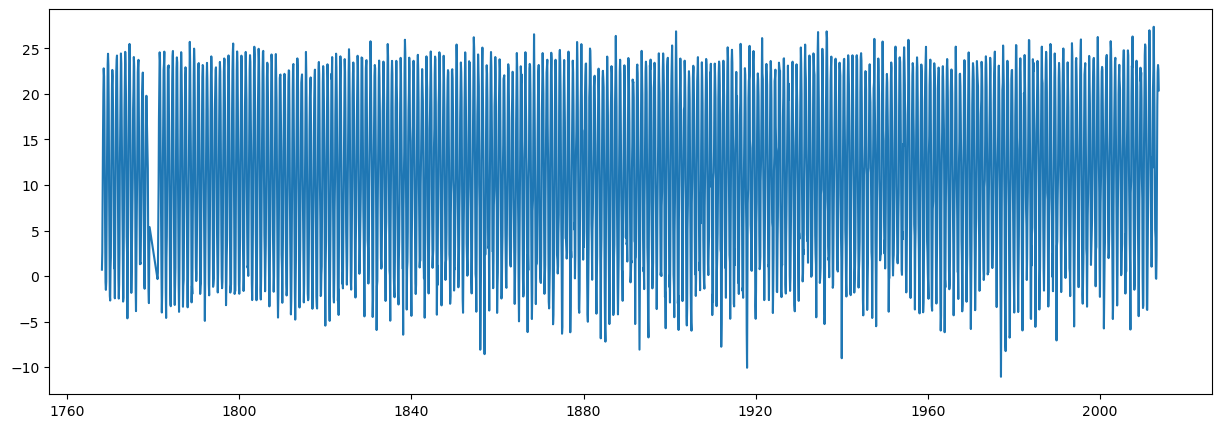

In [185]:
plt.rcParams.update({'figure.figsize': (15,5)})
plt.plot(Citytemp_cincy.tail(2919)['AverageTemperature'])

In [186]:
# There is not a clear trend here, but the magnitude accross time seems to be fairly consistent.
# Because the magnitude seems consistent, and there are negative values, we will use an additive decomposition model.

Text(80.34722222222221, 0.5, 'Observed')

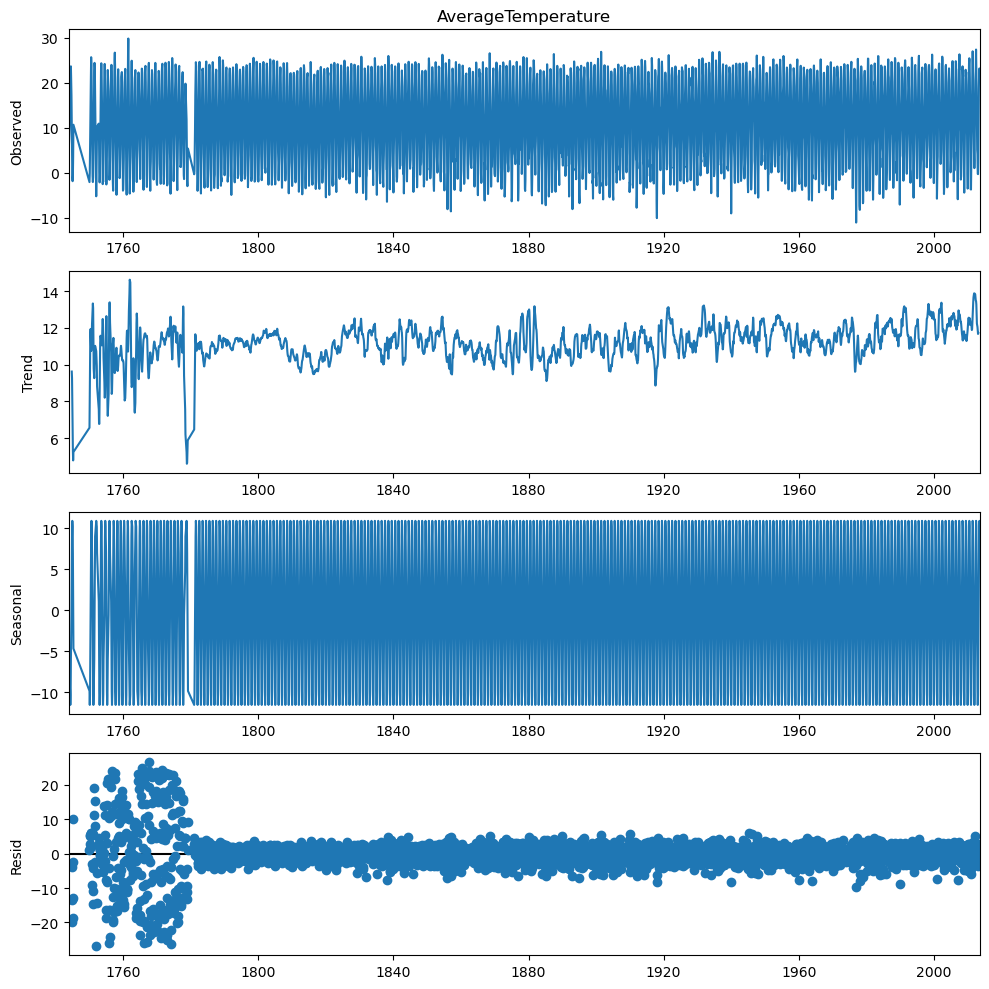

In [187]:
# Additive Decomposition
plt.rcParams.update({'figure.figsize': (10,10)})
add_result = seasonal_decompose(Citytemp_cincy['AverageTemperature'] ,model='additive', period=12)
figcincy = add_result.plot()
figcincy.axes[0].set_ylabel('Observed')

In [188]:
# Creating a new dataframe with the result values from the additive composition
add_result_df = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
add_result_df.columns = ['seasonality', 'trend', 'residual', 'actual_values']
add_result_df.head(10)

,seasonality,trend,residual,actual_values
dt,,,,
1743-11-01,-4.656006,NaN,NaN,4.373
1744-04-01,-9.825114,NaN,NaN,12.745
1744-05-01,-11.526789,NaN,NaN,17.004
1744-06-01,-10.303778,NaN,NaN,22.267
1744-07-01,-5.972204,NaN,NaN,23.653
1744-09-01,-0.547649,NaN,NaN,17.213
1744-10-01,4.649460,9.627875,-3.847335,10.430
1744-11-01,9.009671,9.272875,-13.601546,4.681
1744-12-01,10.904117,7.943833,-19.935951,-1.088


In [189]:
# From the additive composition we can see that the trend values and the actual values are equivalent, and the seasonality 
# and residual are both 0 as this is an additive model.

#  Now we must check to see if the model is stationary, and to do so we are going to use the ADF (Augmented Dickey-Fuller) test

In [190]:
# With an ADF test the null hypothesis is that the model is non-stationary
# testing with alpha = 0.05

adfuller_result = adfuller(Citytemp_cincy.AverageTemperature.values, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critical Values: ')
    print(f' {key} ,{value}')

ADF Statistic: -6.257255527244281
p-value: 4.308659014294718e-08
Critical Values: 
 1% ,-3.4324687252980604
Critical Values: 
 5% ,-2.862476120060324
Critical Values: 
 10% ,-2.5672683196360566


In [191]:
# Because the resulting p-value from the ADF statistic is less than alpha = 0.05, we can reject the null hypothesis and 
# conclude that this time series model is stationary which means that we can use this data to train
# an ARIMA or SARIMA model

# Time Series Analysis of Global Land Temperatures

In [192]:
GlobalTemperatures.tail(10)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057
2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [193]:
# Creating a new datasets for the average land temperature
GlobalTemperaturesAvg = GlobalTemperatures.copy()

# Dropping NaN values
GlobalTemperaturesAvg = GlobalTemperaturesAvg.dropna()

# Cleaning the dataset to only include the necessary data
LandDrop = ['LandAverageTemperatureUncertainty',
           'LandMaxTemperature',
           'LandMaxTemperatureUncertainty',
           'LandMinTemperature',
           'LandMinTemperatureUncertainty',
           'LandAndOceanAverageTemperature',
           'LandAndOceanAverageTemperatureUncertainty']

GlobalTemperaturesAvg.drop(LandDrop, inplace=True, axis=1)
GlobalTemperaturesAvg.tail(10)

,LandAverageTemperature
dt,
2015-03-01,6.740
2015-04-01,9.313
2015-05-01,12.312
2015-06-01,14.505
2015-07-01,15.051
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801
2015-11-01,7.433


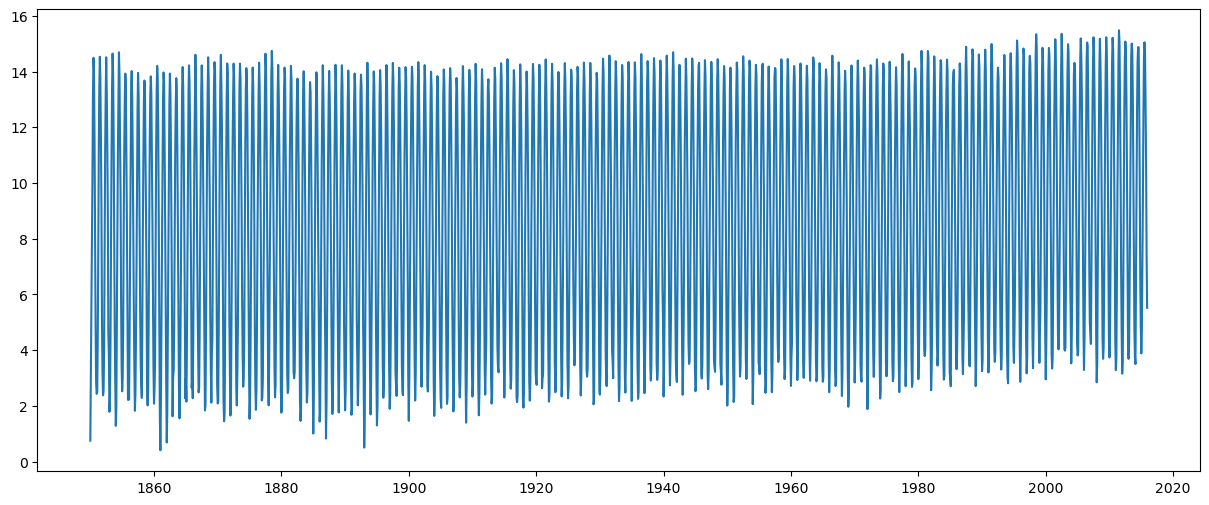

In [194]:
# Analysis of Global Land Temperatures
plt.rcParams.update({'figure.figsize': (15,6)})
plt.plot(GlobalTemperaturesAvg['LandAverageTemperature'])

In [195]:
# Similar to the plot of the data for the temperature of Cincinnati, this plot has very similar magnitude, 
# but this plot also has a slight uptrend. We will again use an additive time series decomposition model 
# given the consistent magnitude

Text(91.97222222222221, 0.5, 'Observed')

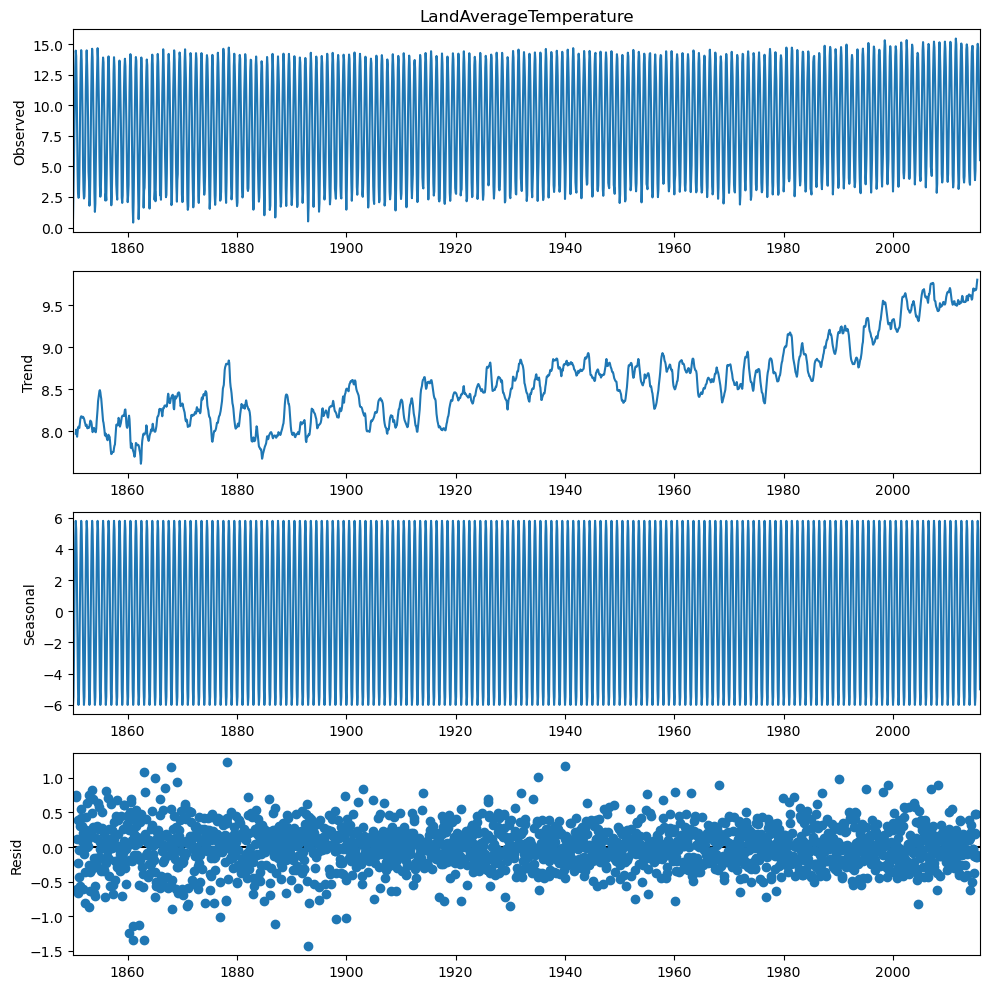

In [196]:
# Additive Decomposition for Global Land Average Temperatures
plt.rcParams.update({'figure.figsize': (10,10)})
AddResultLand = seasonal_decompose(GlobalTemperaturesAvg['LandAverageTemperature'] ,model='additive', period=12)
figLand = AddResultLand.plot()
figLand.axes[0].set_ylabel('Observed')

In [197]:
# Creating a new dataframe with the result values from the additive composition
AddResultLand_df = pd.concat([AddResultLand.seasonal, AddResultLand.trend, AddResultLand.resid, AddResultLand.observed], axis=1)
AddResultLand_df.columns = ['seasonality', 'trend', 'residual', 'actual_values']
AddResultLand_df.tail(10)

,seasonality,trend,residual,actual_values
dt,,,,
2015-03-01,-3.418869,9.679917,0.478952,6.740
2015-04-01,-0.241779,9.695708,-0.140929,9.313
2015-05-01,2.674861,9.745333,-0.108194,12.312
2015-06-01,4.839190,9.803167,-0.137357,14.505
2015-07-01,5.800788,NaN,NaN,15.051
2015-08-01,5.265226,NaN,NaN,14.755
2015-09-01,3.423881,NaN,NaN,12.999
2015-10-01,0.757143,NaN,NaN,10.801
2015-11-01,-2.586157,NaN,NaN,7.433


In [198]:
# From the additive composition we can see that the trend values and the actual values are equivalent, and the seasonality 
# and residual are both 0 as this is an additive model.

#  Now we must check to see if the model is stationary, and to do so we are going to use the ADF
# (Augmented Dickey-Fuller) test

In [199]:
# With an ADF test the null hypothesis is that the model is non-stationary
# testing with alpha = 0.05

AdfullerResultLand = adfuller(GlobalTemperaturesAvg.LandAverageTemperature.values, autolag='AIC')
print(f'ADF Statistic: {AdfullerResultLand[0]}')
print(f'p-value: {AdfullerResultLand[1]}')
for key, value in AdfullerResultLand[4].items():
    print('Critical Values: ')
    print(f' {key} ,{value}')

ADF Statistic: -1.4553284418998174
p-value: 0.5554827476053715
Critical Values: 
 1% ,-3.4336822458349143
Critical Values: 
 5% ,-2.863011992405672
Critical Values: 
 10% ,-2.567553628252692


In [200]:
# Because the resulting p-value from the ADF statistic is greater than alpha = 0.05, we can accept the null hypothesis and 
# conclude that this time series model is not stationary which means that we cannot use this data to train
# an ARIMA or SARIMA model until we are able to make it stationary

# Time Series Analysis of Global Land and Ocean Temperatures

In [201]:
# Creating a new dataset for the average Land and Ocean temperatures
GlobalTemperaturesOcean = GlobalTemperatures.copy()

# Dropping NaN values
GlobalTemperaturesOcean = GlobalTemperaturesOcean.dropna()

# Cleaning the dataset to only include the necessary data
OceanDrop = ['LandAverageTemperature',
             'LandAverageTemperatureUncertainty',
             'LandMaxTemperature',
             'LandMaxTemperatureUncertainty',
             'LandMinTemperature',
             'LandMinTemperatureUncertainty',
             'LandAndOceanAverageTemperatureUncertainty']

GlobalTemperaturesOcean.drop(OceanDrop, inplace=True, axis=1)
GlobalTemperaturesOcean.tail(10)

,LandAndOceanAverageTemperature
dt,
2015-03-01,15.193
2015-04-01,15.962
2015-05-01,16.774
2015-06-01,17.390
2015-07-01,17.611
2015-08-01,17.589
2015-09-01,17.049
2015-10-01,16.290
2015-11-01,15.252


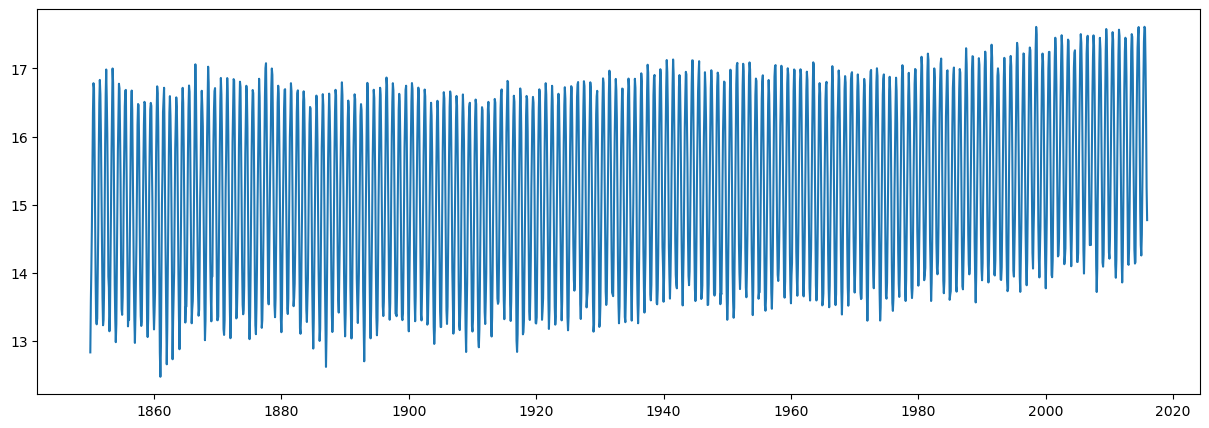

In [202]:
# Analysis of Global Land and Ocean Temperatures
plt.rcParams.update({'figure.figsize': (15,5)})
plt.plot(GlobalTemperaturesOcean['LandAndOceanAverageTemperature'])

In [203]:
# This plot has an even more drastic uptrend in comparison to the plot for just Global Land temperatures, which shows
# that the oceans are warming at a rate quicker than Land

# Again, the magnitude is consistent, so we will again use an additive decomposition model

Text(91.97222222222221, 0.5, 'Observed')

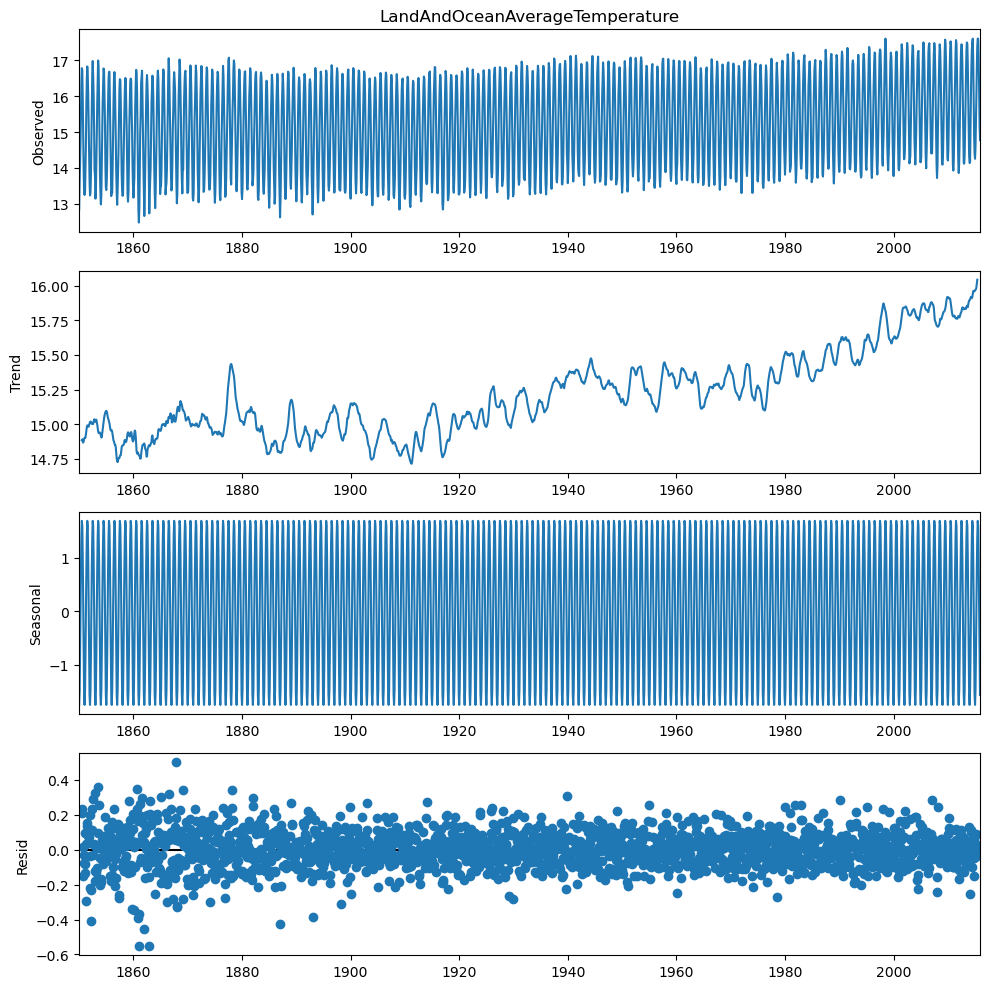

In [204]:
# Additive Decomposition for Global Land and Ocean Average Temperatures
plt.rcParams.update({'figure.figsize': (10,10)})
AddResultOcean = seasonal_decompose(GlobalTemperaturesOcean['LandAndOceanAverageTemperature'] ,model='additive', period=12)
figOcean = AddResultOcean.plot()
figOcean.axes[0].set_ylabel('Observed')

In [205]:
# Creating a new dataframe with the result values from the additive composition
AddResultOcean_df = pd.concat([AddResultOcean.seasonal, AddResultOcean.trend, AddResultOcean.resid, 
                               AddResultOcean.observed], axis=1)
AddResultOcean_df.columns = ['seasonality', 'trend', 'residual', 'actual_values']
AddResultOcean_df.head(10)

,seasonality,trend,residual,actual_values
dt,,,,
1850-01-01,-1.749500,NaN,NaN,12.833
1850-02-01,-1.488147,NaN,NaN,13.588
1850-03-01,-0.870497,NaN,NaN,14.043
1850-04-01,0.006265,NaN,NaN,14.667
1850-05-01,0.785706,NaN,NaN,15.507
1850-06-01,1.384713,NaN,NaN,16.353
1850-07-01,1.690463,14.884333,0.208204,16.783
1850-08-01,1.596197,14.890792,0.231012,16.718
1850-09-01,0.998017,14.874000,0.013983,15.886


In [206]:
# From the additive composition we can see that the trend values and the actual values are equivalent, and the seasonality 
# and residual are both 0 as this is an additive model.

#  Now we must check to see if the model is stationary, and to do so we are going to use the ADF
# (Augmented Dickey-Fuller) test

In [207]:
# With an ADF test the null hypothesis is that the model is non-stationary
# testing with alpha = 0.05

AdfullerResultOcean = adfuller(GlobalTemperaturesOcean.LandAndOceanAverageTemperature.values, autolag='AIC')
print(f'ADF Statistic: {AdfullerResultOcean[0]}')
print(f'p-value: {AdfullerResultOcean[1]}')
for key, value in AdfullerResultOcean[4].items():
    print('Critical Values: ')
    print(f' {key} ,{value}')

ADF Statistic: -1.1352987107322468
p-value: 0.700791940598111
Critical Values: 
 1% ,-3.4336822458349143
Critical Values: 
 5% ,-2.863011992405672
Critical Values: 
 10% ,-2.567553628252692


In [208]:
# Because the resulting p-value from the ADF statistic is greater than alpha = 0.05, we can accept the null hypothesis and 
# conclude that this time series model is not stationary which means that we cannot use this data to train
# an ARIMA or SARIMA model until we are able to make it stationary

# The p-value confirms that the uptrend of temperatures for Land and Ocean is more drastic than the temperatures just for Land